<a href="https://colab.research.google.com/github/divyanshvn/SoC21_Image_Colrization/blob/main/VGGnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision 
import torchvision.transforms as transforms

In [ ]:
class VGGnet(nn.Module):
    
    def __init__(self):

        super().__init__()

        self.net = nn.Sequential(
            nn.Conv2d(3,64,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(64,64,3,1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(128,128,3,1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(256,256,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(256,256,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(256,256,3,1,padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(256,512,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.MaxPool(2,2),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.Conv2d(512,512,3,1,padding=2),
            nn.ReLU(),
            nn.MaxPool(2,2),
        )

        self.classifier = nn.Sequential(
            nn.Dropout(inplace=True),
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Dropout(inplace=True),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Dropout(inplace=True),
            nn.Linear(in_features=4096, out_features=1000),
        )
    
    def forward(self,x):
        x = self.net(x)
        x = torch.flatten(x,1)
        return self.classifier(x)
    
    def init_bias_weights(self):

    


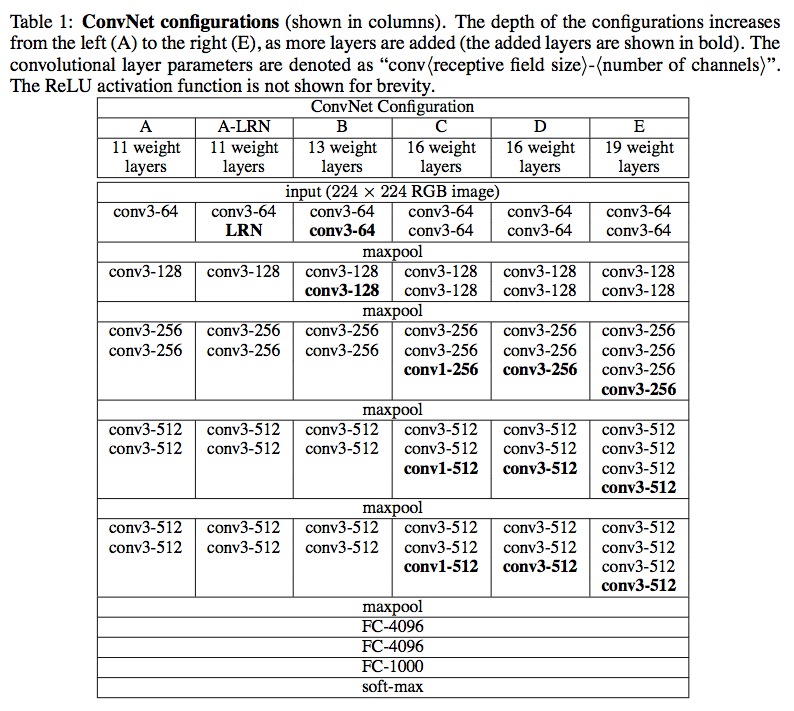